# Assignment 7
## Due June 12th
### names:

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

np.random.seed(42)

## Exercise 1

In [5]:
data, labels = make_classification(n_samples=1000, n_features=30, n_informative=15, n_redundant=2, n_repeated=2, n_classes=2, n_clusters_per_class=2, random_state=42, class_sep=0.5)

### a)

In [7]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.33)
print(train_data.shape)
print(test_data.shape)

(670, 30)
(330, 30)


### b)

In [11]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'auto']}

kernel_svm = svm.SVC(kernel="rbf")
cv = GridSearchCV(estimator=kernel_svm, param_grid=parameters, cv=10)
cv.fit(train_data, train_labels)
cv.best_params_

{'C': 10, 'gamma': 0.01}

### c)

In [19]:
kernel_svm = svm.SVC(kernel="rbf", C=10, gamma=0.01)
kernel_svm.fit(train_data, train_labels)
print("Risk: %f"%(1 -kernel_svm.score(test_data, test_labels)))

predicted_labels = kernel_svm.predict(test_data)

      
def unbalanced_loss(true_labels, predicted_labels):
    loss = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == 0 and true_labels[i] == 1:
            loss += 0.2
        elif ( predicted_labels[i] == 1 and true_labels[i] == 0):
            loss += 1.8
    return loss/len(true_labels)

print("Unbalanced risk: %f" %unbalanced_loss(test_labels, predicted_labels))

Risk: 0.115152
Unbalanced loss: 0.120000


### d)

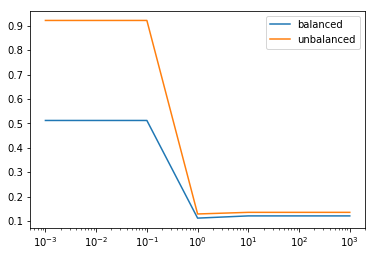

In [24]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
balanced_losses, unbalanced_losses = [],[]
for c in Cs:
    ksvc = svm.SVC(kernel = "rbf", C=c)
    ksvc.fit(train_data, train_labels)
    predicted_labels = ksvc.predict(test_data)
    balanced_losses.append(1 - ksvc.score(test_data, test_labels))
    unbalanced_losses.append(unbalanced_loss(test_labels, predicted_labels))

plt.semilogx(Cs, balanced_losses, label="balanced")
plt.semilogx(Cs, unbalanced_losses, label="unbalanced")
plt.legend()
# The best value for C seems to be 1 for both losses, even though there doesn't
# seem to be much of a difference for the higher Cs  
    

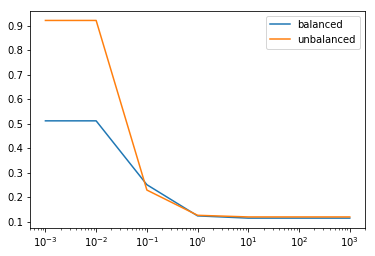

In [25]:
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
balanced_losses, unbalanced_losses = [],[]
for c in Cs:
    ksvc = svm.SVC(kernel = "rbf", C=c, gamma=0.01)
    ksvc.fit(train_data, train_labels)
    predicted_labels = ksvc.predict(test_data)
    balanced_losses.append(1 - ksvc.score(test_data, test_labels))
    unbalanced_losses.append(unbalanced_loss(test_labels, predicted_labels))

plt.semilogx(Cs, balanced_losses, label="balanced")
plt.semilogx(Cs, unbalanced_losses, label="unbalanced")
plt.legend()
#The overall result is better and moving quicker towards a lower loss, and C = 10 seems to be slightly better

### e)

In [26]:
X, Y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2, random_state=42, class_sep=0.75)
X_train, Y_train = X[:120], Y[:120]
X_test, Y_test = X[120:], Y[120:]

### gaussian kernel

In [34]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'auto']}

rbf_svm = svm.SVC(kernel="rbf")
cv = GridSearchCV(estimator=rbf_svm, param_grid=parameters, cv=10)
cv.fit(X_train, Y_train)
cv.best_params_

{'C': 1, 'gamma': 0.01}

### linear kernel

In [30]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'auto']}
lin_svm = svm.SVC(kernel="linear")
cv = GridSearchCV(estimator=lin_svm, param_grid=parameters)
cv.fit(X_train, Y_train)
cv.best_params_

{'C': 0.1, 'gamma': 0.001}

### polynomial order 2

In [32]:
# Normalizing the data since the polynomial svc seems to take ages with unnormalized data
X_train = normalize(X_train)


parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'auto']}
poly_2_svm = svm.SVC(kernel="poly", degree=2)
cv = GridSearchCV(estimator=poly_2_svm, param_grid=parameters)
cv.fit(X_train, Y_train)
cv.best_params_

{'C': 0.001, 'gamma': 0.001}

### polynomial order 3

In [35]:
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 'auto']}
poly_3_svm = svm.SVC(kernel="poly", degree=3)
cv = GridSearchCV(estimator=poly_3_svm, param_grid=parameters)
cv.fit(X_train, Y_train)
cv.best_params_

{'C': 10, 'gamma': 1000}

### f)

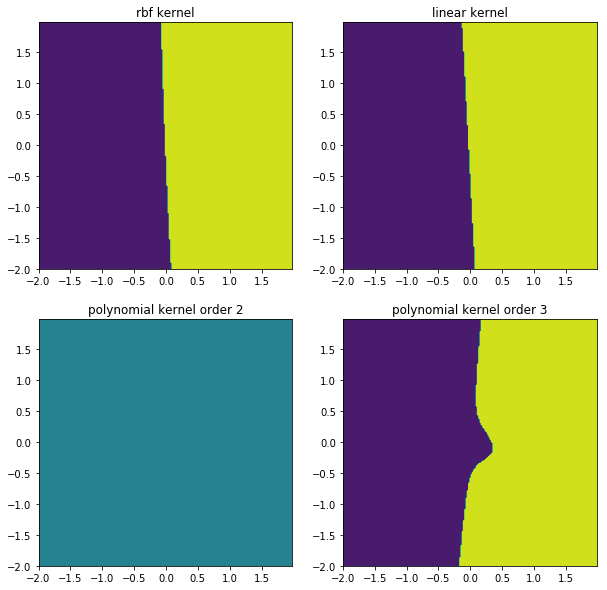

In [39]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


gaussian_svm = svm.SVC(kernel="rbf", C=10, gamma = 0.01)
gaussian_svm.fit(X_train, Y_train)


xx,yy = make_meshgrid(X_train[:,0], X_train[:,1])
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax1.set_title("rbf kernel")
plot_contours(ax1, gaussian_svm,xx,yy)

linear_svm = svm.SVC(kernel="linear", C=0.1, gamma=0.001)
linear_svm.fit(X_train, Y_train)

xx,yy = make_meshgrid(X_train[:,0], X_train[:,1])
ax2 = fig.add_subplot(222)
ax2.set_title("linear kernel")
plot_contours(ax2, linear_svm,xx,yy)

poly_2_svm = svm.SVC(kernel="poly", degree=2, C=0.001, gamma=0.001)
poly_2_svm.fit(X_train, Y_train)

xx,yy = make_meshgrid(X_train[:,0], X_train[:,1])
ax3 = fig.add_subplot(223)
ax3.set_title("polynomial kernel order 2")
plot_contours(ax3, poly_2_svm,xx,yy)

poly_3_svm = svm.SVC(kernel="poly", degree=3, C=10, gamma=1000)
poly_3_svm.fit(X_train, Y_train)

xx,yy = make_meshgrid(X_train[:,0], X_train[:,1])
ax4 = fig.add_subplot(224)
ax4.set_title("polynomial kernel order 3")
plot_contours(ax4, poly_3_svm,xx,yy)